<a href="https://colab.research.google.com/github/ArifAygun/Iron-Ore-Froth-Flotation-Quality-Prediction/blob/main/Iron_Ore_Froth_Flotation_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Quality Prediction of Iron Ore Mining Flotation Process**

####**What is Froth Flotation Process**

Froth flotation is an important concentration process. This process can be used to separate any two different particles and operated by the surface chemistry of the particles. In flotation, bubbles are introduced into a pulp and the bubbles rise through the pulp. In the process, hydrophobic particles become bound to the surface of the bubbles. The driving force for this attachment is the change in the surface free energy when the attachment occurs. These bubbles rise through the slurry and are collected from the surface. To enable these particles to attach, careful consideration of the chemistry of the pulp needs to be made.

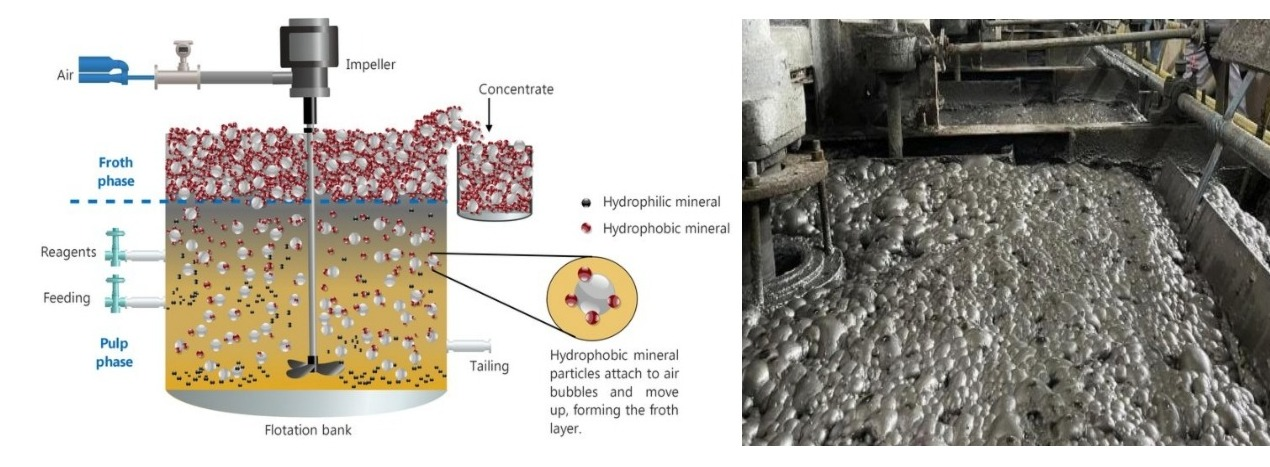

####**Machine Learning Approach to Iron Ore Froth Flotation Process**

In the iron ore mining processing, in order to achieve the desired quality in the froth flotation processing plant, stakeholders rely on conventional laboratory test technique which usually takes more than two hours to ascertain the two variables of interest. Such a substantial dead time makes it difficult to put the inherent stochastic nature of the plant system in steady-state.
Thus, the present study aims to evaluate the feasibility of using machine learning algorithms to predict the percentage of silica concentrate (SiO2) in the froth flotation processing plant in real-time. Different feature selection methods including Random Forest and backward elimination technique were applied to the dataset to extract significant features. The selected features were then used in Multiple Linear Regression, Random Forest models and the prediction accuracy of all the models have been evaluated and compared with each other.

The main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica is in the ore concentrate. We can help the engineers, giving them early information to take actions. Hence, they will be able to take corrective actions in advance and also help the environment by reducing the amount of ore that goes to tailings as we reduce silica in the ore concentrate.

####**What are we looking for?**

- Can we accurately predict Silica Concentrate, so we can have a chance to act on it before lab tests come back?
- What are the most important variables and how do they influence the level of Silica Concentrate?
- What values should we choose for controllable variables?
- Is it possible to predict % Silica Concentrate every minute?
- How many steps (hours) ahead can we predict % Silica Concentrate?
- Is it possible to predict % Silica in Concentrate whitout using % Iron Concentrate column?

####**Import Libraries and Modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

####**Import Dataset**

In [41]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Flotation/

raw_data = pd.read_csv('Flotation_Plant.csv', sep= ',', decimal = ',')
raw_data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Flotation


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [42]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

**Column Definitions**:

- **Date**: Data collection time.
- **% Iron Feed**: Feed grade of iron-containing ore.
- **% Silica Feed**: Feed grade of silica-containing ore.
- **Starch Flow**: Depressant chemical for Iron(Fe) containing ore measured in m³/h.
- **Amina Flow**: Collector chemical for Silica containing ore measured in m³/h.
- **Ore Pulp Flow**: The amount of pulp flow fed to the flotation columns as the product of the previous process step measured in t/h.
- **Ore Pulp pH**: pH is measured in pH scale from 0 to 14.
- **Ore Pulp Density**: The solid percent of ore fed density ranges from 1 to 3 kg/cm³
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Air Flow**: Air Flows that goes into the flotation cell measured in Nm³/h.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Level**: Froth level in the flotation cell measured in mm.
- **% Iron Concentrate**: Concentrate grade of iron-containing ore.
- **% Silica Concentrate**: Concentrate grade of silica-containing ore

In [43]:
raw_data.shape

(737453, 24)

In [44]:
df_datatype = pd.concat([raw_data.dtypes, raw_data.nunique(),
                         round(raw_data.nunique()*100/len(raw_data), 2),
                         raw_data.isnull().sum(),
                         round(raw_data.isnull().sum()*100/len(raw_data),2)],
                        axis=1)

df_datatype.columns = ['data type',
                       'No. of categories',
                       'No. of categories %',
                       'missing values',
                       'missing values %']

df_datatype.sort_values(by='missing values %',
                        ascending=False, inplace=True)
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
date,object,4097,0.56,0,0.0
% Iron Feed,float64,278,0.04,0,0.0
% Iron Concentrate,float64,38696,5.25,0,0.0
Flotation Column 07 Level,float64,295667,40.09,0,0.0
Flotation Column 06 Level,float64,301502,40.88,0,0.0
Flotation Column 05 Level,float64,276051,37.43,0,0.0
Flotation Column 04 Level,float64,309264,41.94,0,0.0
Flotation Column 03 Level,float64,322315,43.71,0,0.0
Flotation Column 02 Level,float64,331189,44.91,0,0.0
Flotation Column 01 Level,float64,299573,40.62,0,0.0


- looks like we do not have missing values across the dataframe

In [45]:
#checking if there are any duplicate rows
duplicate_rows = raw_data[raw_data.duplicated()]
duplicate_rows.shape

(1171, 24)

In [46]:
#dropping date column since it is not important while predicting the % Silica Concentrate
cols_to_drop = ('date')
df = raw_data.drop(columns = cols_to_drop)
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [47]:
df.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [48]:
#check duplicated rows
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(1171, 23)

In [49]:
df = df.drop_duplicates()
df.shape

(736282, 23)

In [50]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


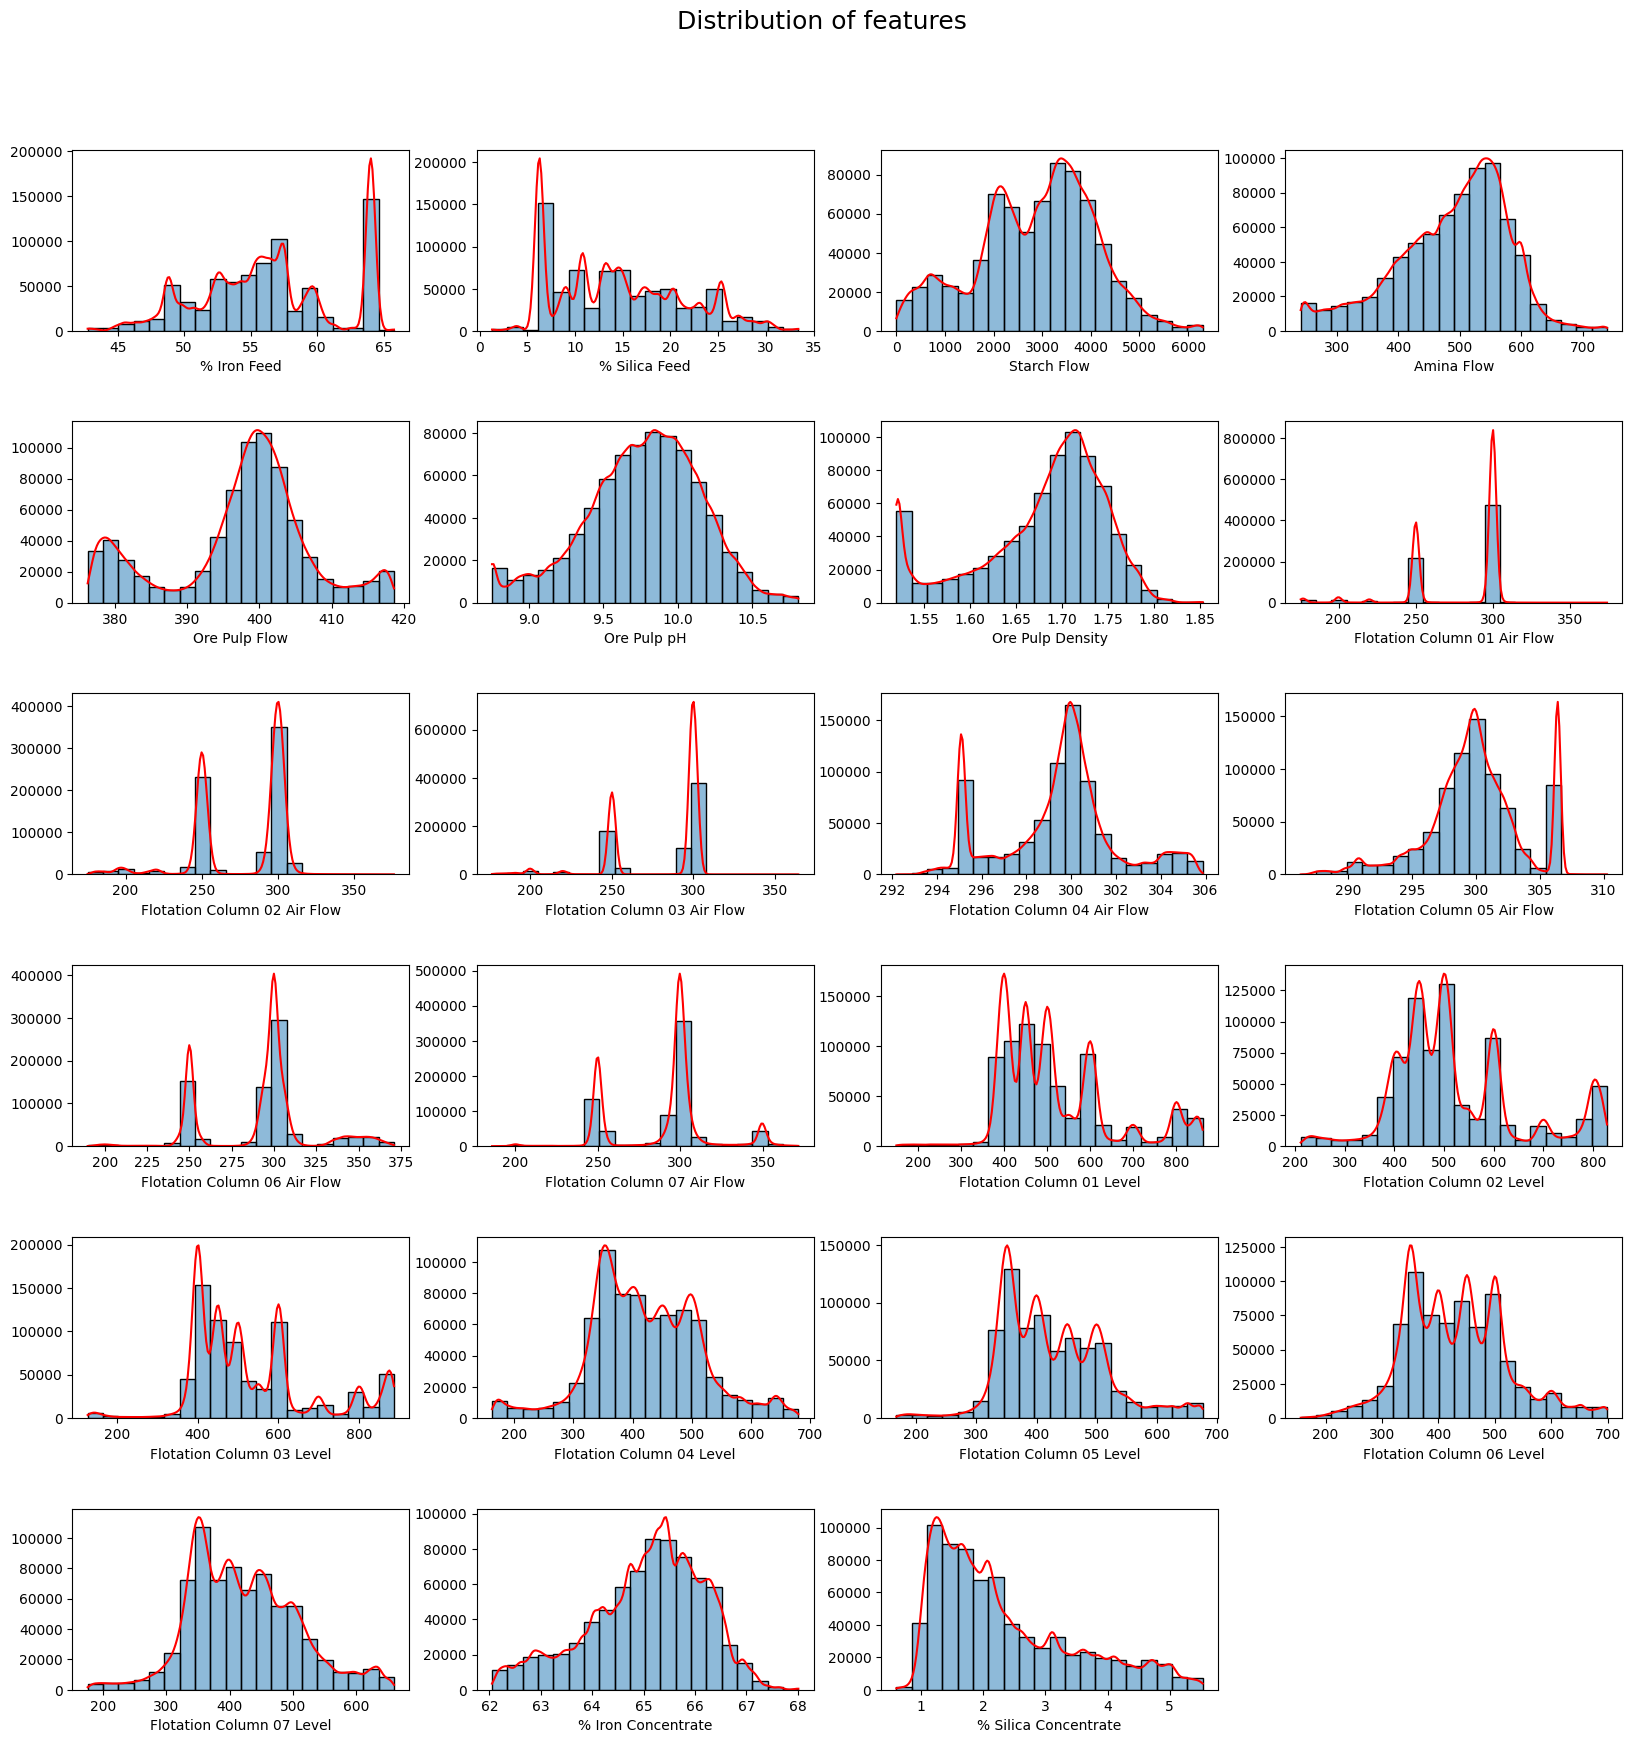

In [51]:
features = df.columns
plt.figure(figsize= (20,20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of features", fontsize=18, y=0.95)
for i, feature in enumerate(features):
 k = i + 1
 plt.subplot(6,4,int(k))
 sns.histplot(data = df, x= feature,kde=True, bins = 20).lines[0].set_color('red')
 plt.xlabel(feature)
 plt.ylabel("")
plt.show()

- Distribution of Target Variable

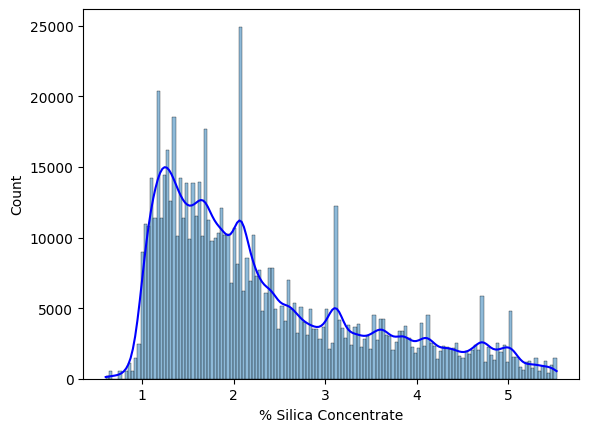

In [52]:
sns.histplot(data = df, x = "% Silica Concentrate", kde = True).lines[0].set_color('blue')

Text(0.5, 0, '%')

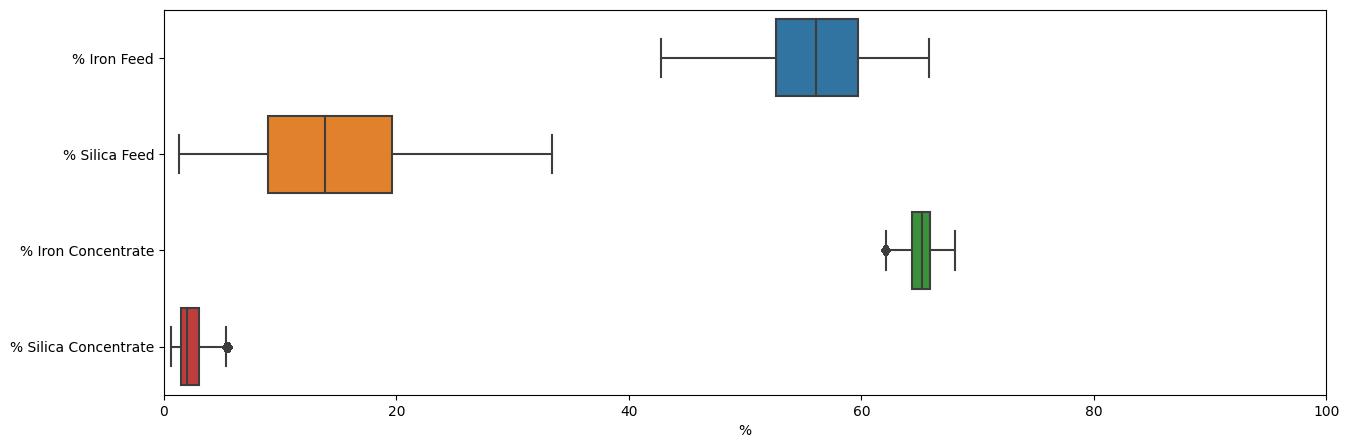

In [59]:
#box plots of Iron Feed and Silica Feed
plt.figure(figsize = (15, 5))
sns.boxplot(data = df[['% Iron Feed', '% Silica Feed','% Iron Concentrate','% Silica Concentrate']], orient = 'h').set(xlim = (0, 100))
plt.xlabel('%')

In [9]:
from sklearn.preprocessing import StandardScaler
# create the scaler object
scaler = StandardScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(df2)
# create a new DataFrame from the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df2.columns)


In [10]:
df_scaled.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,-0.212252,0.342021,0.123757,0.759497,-0.192311,0.771979,0.860958,-1.044447,-0.793549,-1.068217,...,-1.390678,-0.479708,-0.699782,-0.705365,0.253142,0.910896,0.182824,1.205337,1.662667,-0.903346
1,-0.212252,0.342021,0.127772,0.831085,-0.020142,0.774046,0.860958,-1.027399,-0.883202,-1.058202,...,-1.456600,-0.521726,-0.726326,-0.652429,0.302470,0.841198,0.177839,0.907674,1.662667,-0.903346
2,-0.212252,0.342021,0.143449,0.875906,0.215431,0.776113,0.860958,-1.026656,-0.971364,-1.077426,...,-1.488794,-0.526695,-0.419167,-0.641351,0.319922,0.699814,0.199027,0.442280,1.662667,-0.903346
3,-0.212252,0.342021,0.146658,0.882603,0.037179,0.778439,0.860958,-1.020714,-0.752022,-1.086670,...,-1.381505,-0.517528,-0.503137,-0.586625,0.282033,0.546033,0.086232,0.078309,1.662667,-0.903346
4,-0.212252,0.342021,0.135409,0.767532,0.275844,0.780506,0.860958,-1.011059,-0.830001,-1.092063,...,-1.458902,-0.517528,-0.544217,-0.535856,0.363301,0.441781,0.152912,0.054867,1.662667,-0.903346


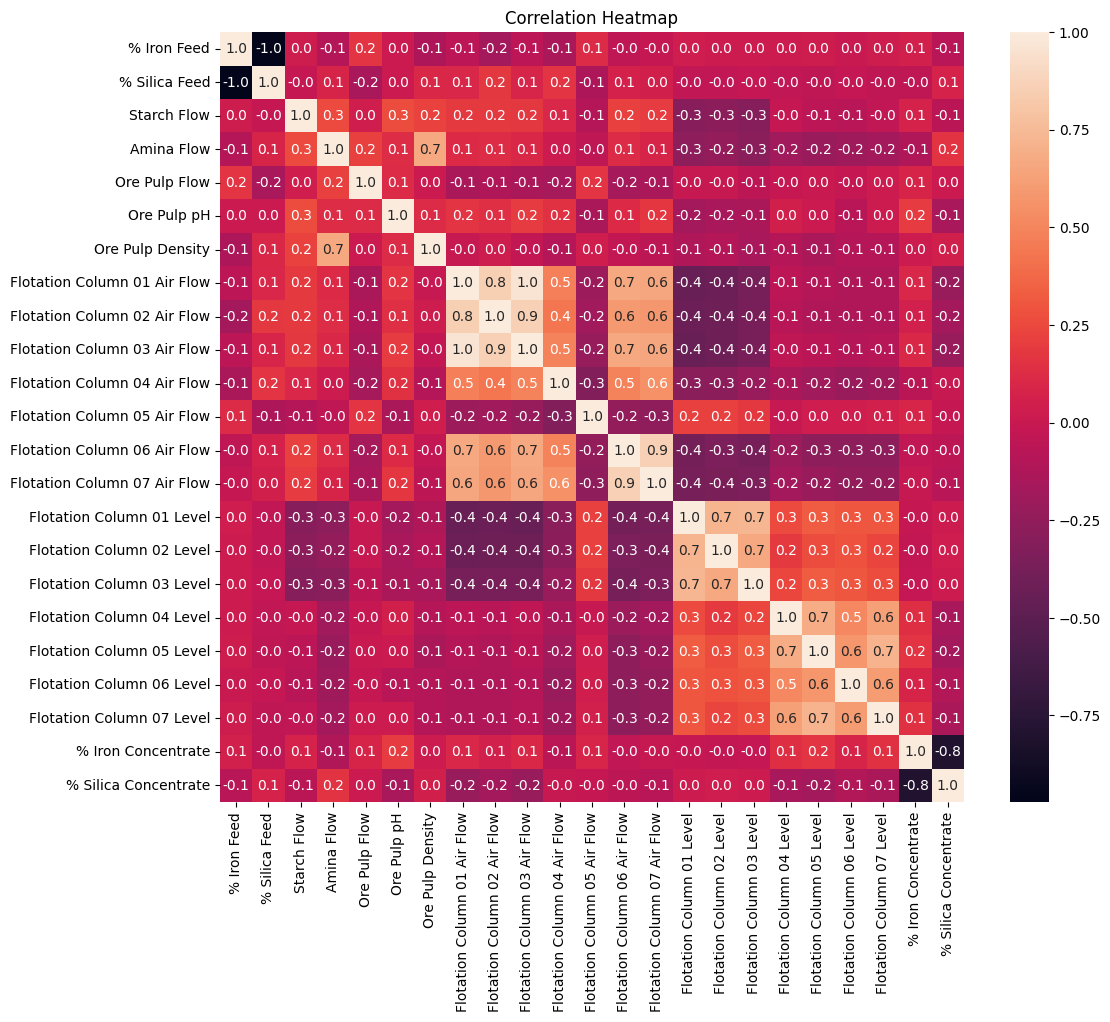

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_scaled.corr(), fmt='.1f', annot=True)
plt.title('Correlation Heatmap')
plt.show()


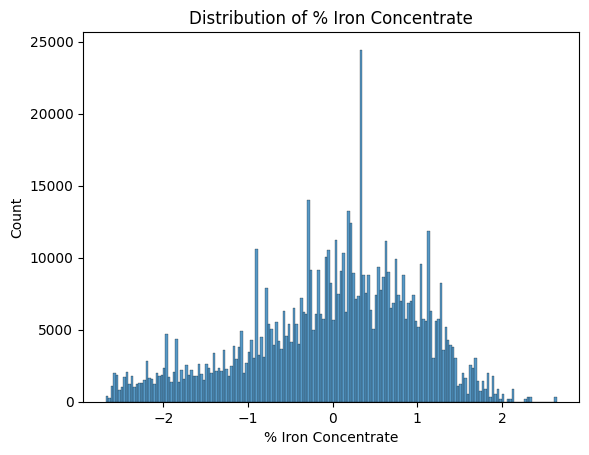

In [ ]:
# Visualize the distribution of the target variable (% Iron Concentrate)
sns.histplot(data=df_scaled, x='% Iron Concentrate')
plt.title('Distribution of % Iron Concentrate')
plt.show()

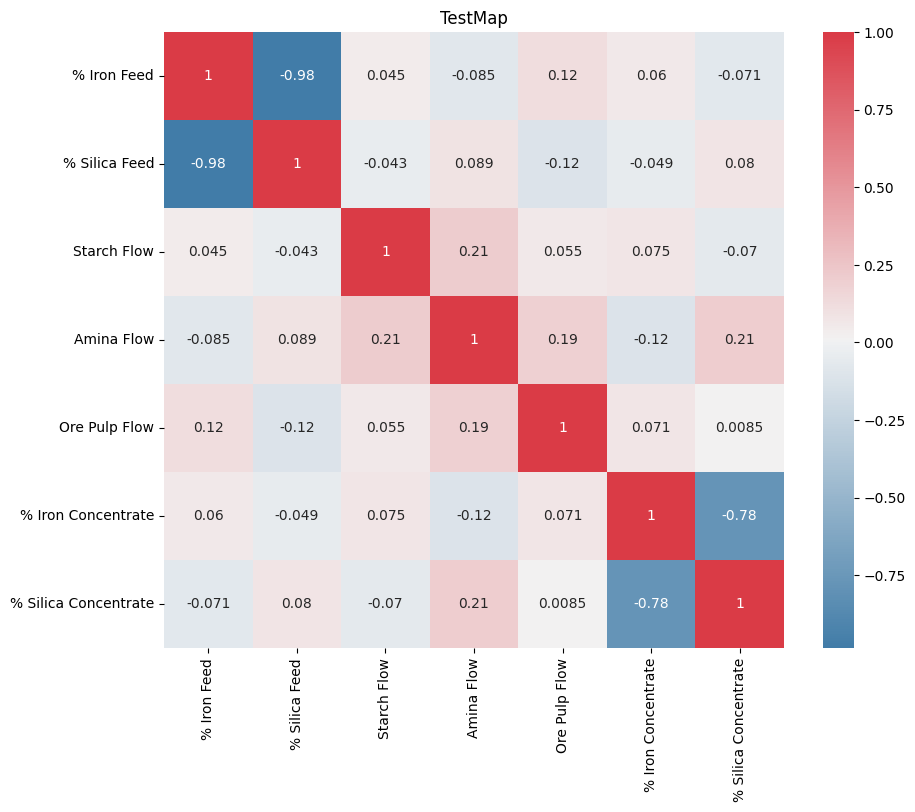

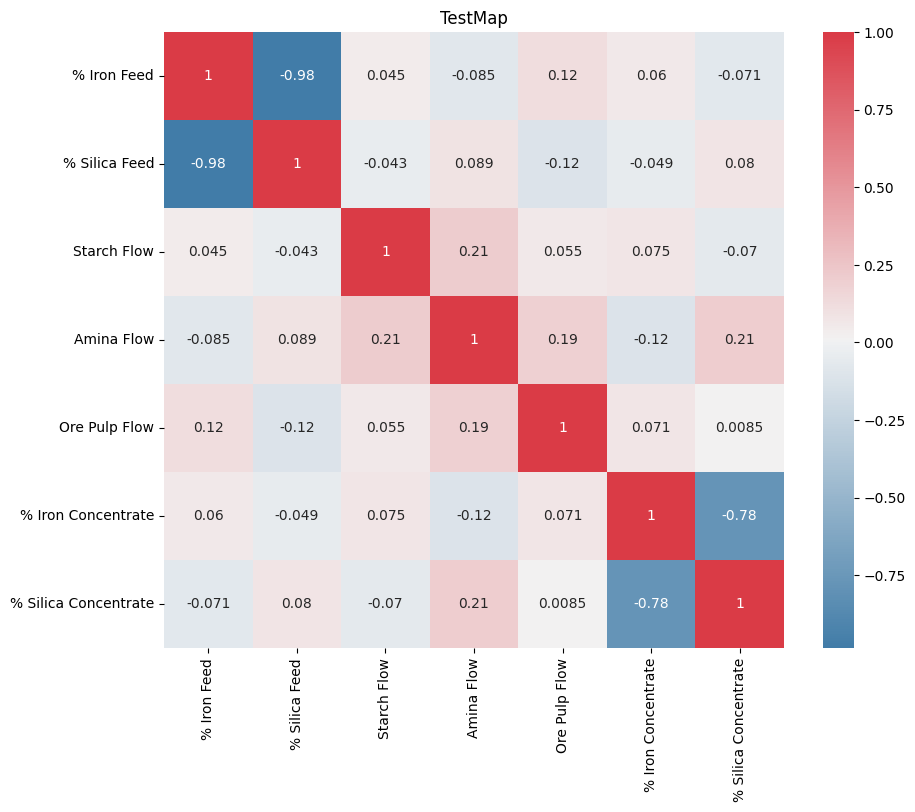

In [12]:
def heatmap_corrplot(df_scaled, columns, corr_method="pearson", title="", file=None):
  # Calculate the correlations between columns
    corr = df_scaled[columns].corr(method=corr_method)
    # Create the heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
    sns.heatmap(corr, cmap=cmap, annot=True, ax=ax)
    # Set the plot title
    ax.set_title(title)
    # Save the plot if file is specified
    if file is not None:
        fig.savefig(file, dpi=300, bbox_inches='tight')
    plt.show()
    return fig

heatmap_corrplot(df_scaled, df_scaled.columns[[0, 1, 2, 3, 4, -2, -1]], corr_method="spearman", title="TestMap")

array([[<Axes: title={'center': '% Iron Feed'}>,
        <Axes: title={'center': '% Silica Feed'}>]], dtype=object)

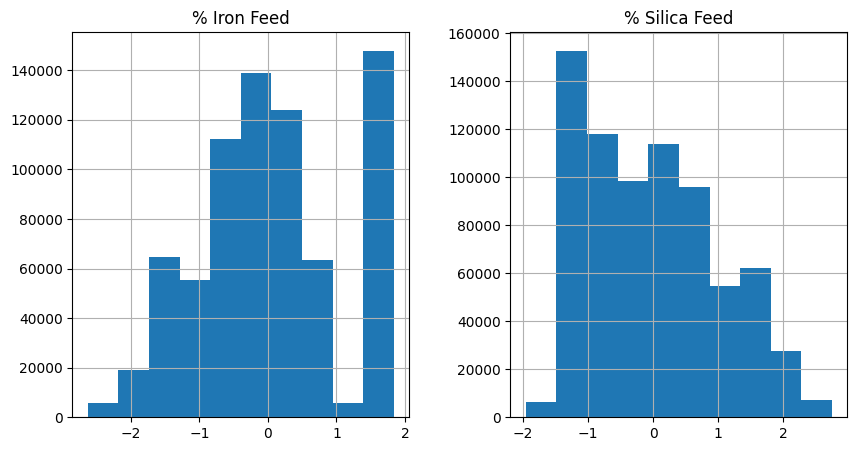

In [25]:
df_scaled.hist(column=['% Iron Feed', '% Silica Feed'],
                       grid=True,figsize=(10,5))

array([[<Axes: title={'center': 'Starch Flow'}>,
        <Axes: title={'center': 'Amina Flow'}>],
       [<Axes: title={'center': 'Ore Pulp Flow'}>,
        <Axes: title={'center': 'Ore Pulp pH'}>],
       [<Axes: title={'center': 'Ore Pulp Density'}>, <Axes: >]],
      dtype=object)

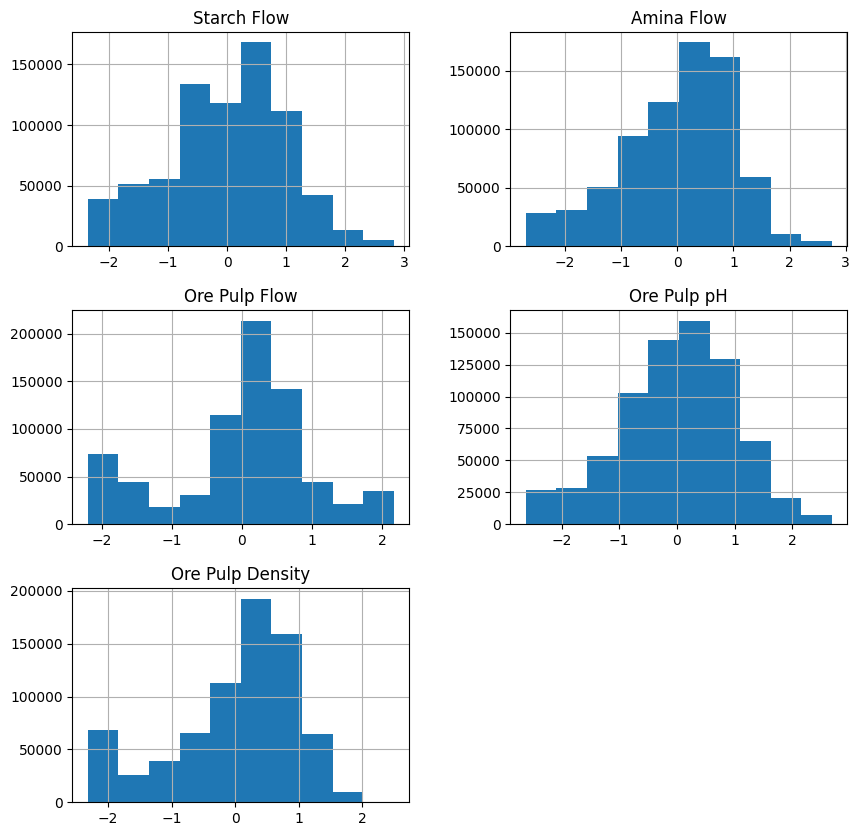

In [26]:
df_scaled.hist(column=['Starch Flow',
                       'Amina Flow',
                       'Ore Pulp Flow',
                       'Ore Pulp pH',
                       'Ore Pulp Density'],
                       grid=True,figsize=(10,10))

array([[<Axes: title={'center': 'Flotation Column 01 Air Flow'}>,
        <Axes: title={'center': 'Flotation Column 02 Air Flow'}>,
        <Axes: title={'center': 'Flotation Column 03 Air Flow'}>],
       [<Axes: title={'center': 'Flotation Column 04 Air Flow'}>,
        <Axes: title={'center': 'Flotation Column 05 Air Flow'}>,
        <Axes: title={'center': 'Flotation Column 06 Air Flow'}>],
       [<Axes: title={'center': 'Flotation Column 07 Air Flow'}>,
        <Axes: >, <Axes: >]], dtype=object)

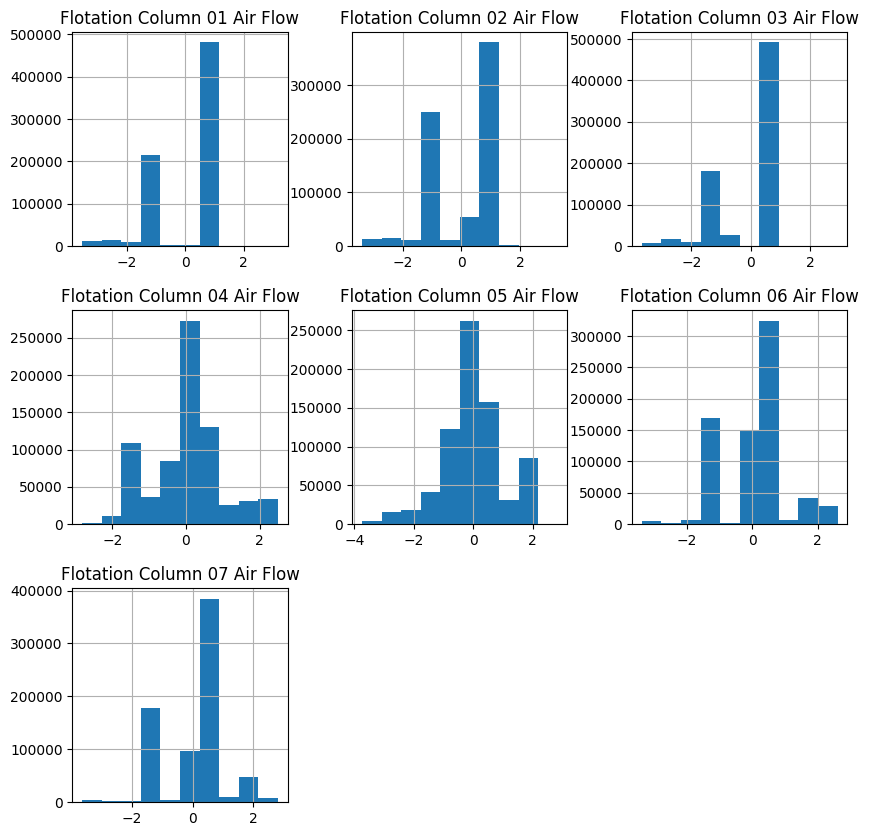

In [27]:
df_scaled.hist(column=['Flotation Column 01 Air Flow',
                       'Flotation Column 02 Air Flow',
                       'Flotation Column 03 Air Flow',
                       'Flotation Column 04 Air Flow',
                       'Flotation Column 05 Air Flow',
                       'Flotation Column 06 Air Flow',
                       'Flotation Column 07 Air Flow',],
                       grid=True,figsize=(10,10))

array([[<Axes: title={'center': 'Flotation Column 01 Level'}>,
        <Axes: title={'center': 'Flotation Column 02 Level'}>,
        <Axes: title={'center': 'Flotation Column 03 Level'}>],
       [<Axes: title={'center': 'Flotation Column 04 Level'}>,
        <Axes: title={'center': 'Flotation Column 05 Level'}>,
        <Axes: title={'center': 'Flotation Column 06 Level'}>],
       [<Axes: title={'center': 'Flotation Column 07 Level'}>, <Axes: >,
        <Axes: >]], dtype=object)

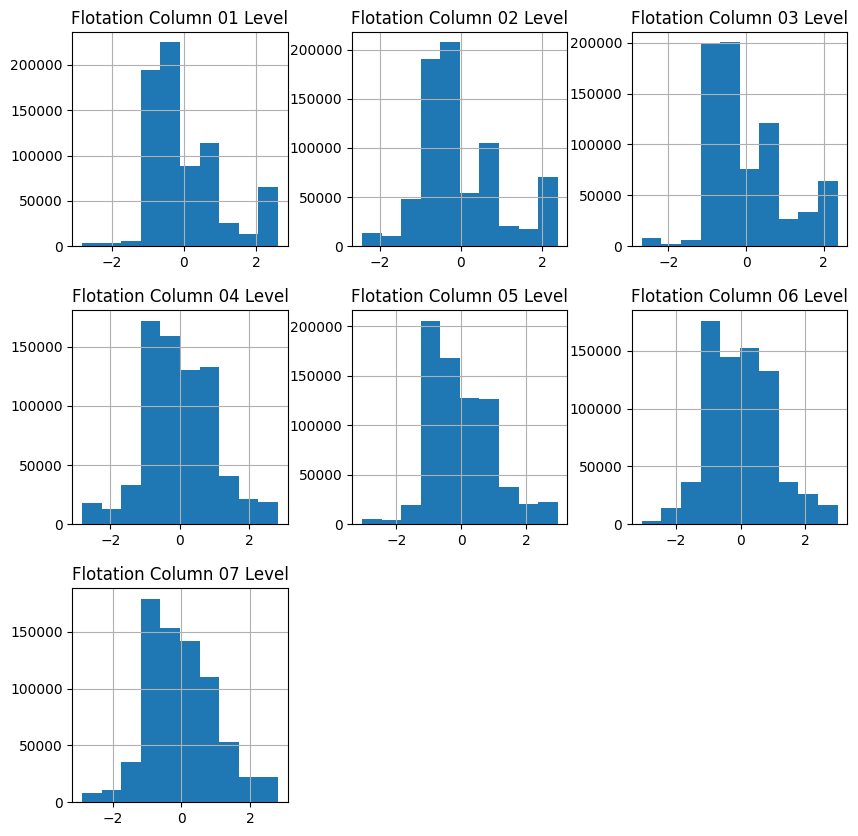

In [28]:
df_scaled.hist(column=['Flotation Column 01 Level',
                       'Flotation Column 02 Level', 'Flotation Column 03 Level',
                       'Flotation Column 04 Level', 'Flotation Column 05 Level',
                       'Flotation Column 06 Level', 'Flotation Column 07 Level'],
                       grid=True,figsize=(10,10))

###**Features with and without iron concentrate**

In [13]:
# with and without iron concentrate
target = '% Silica Concentrate'
y = df_scaled[target]
X = df_scaled.drop([target , '% Iron Concentrate'] , axis = 1)

Xi = df_scaled.drop(target , axis = 1) # with iron

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.70)
Xi_train , Xi_test , yi_train , yi_test = train_test_split(Xi , y , train_size = 0.70)

In [15]:
model1 = LinearRegression()
model2 = LinearRegression()

In [16]:
model1.fit(X_train , y_train)
print(f'model without iron R^2 score: {model1.score(X_test , y_test)}')

model without iron R^2 score: 0.15311043172043226


In [17]:
model2.fit(Xi_train , yi_train)
print(f'model without iron R^2 score: {model2.score(Xi_test , yi_test)}')

model without iron R^2 score: 0.6788545048576835


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=55,test_size=0.3)

In [20]:
X.shape, y.shape

((737453, 21), (737453,))